In [34]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models
canv = ROOT.TCanvas("canv","canv",800,400)
import numpy as np
from scipy.optimize import least_squares
np.random.seed(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


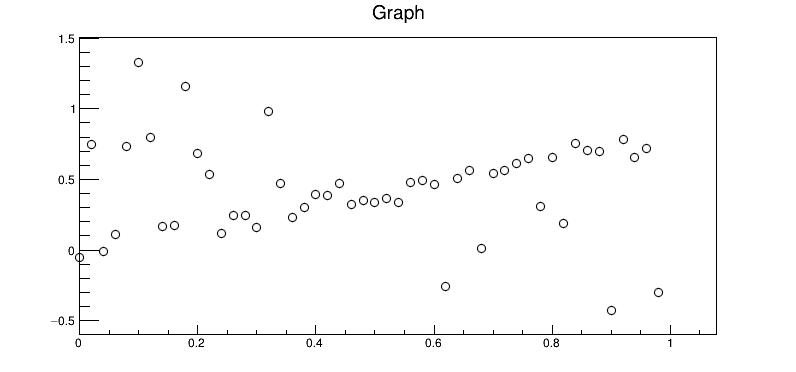

In [95]:
x_list = []
y_list = []
for i in range(50):
    x = float(i)/50.
    x_list.append(x)
    if np.random.random()>0.2:
        y_list.append(0.8*x + (np.random.random()-0.5)/5.)
    else:
        y_list.append(1.-1.5*x + (np.random.random()-0.5))
gr = makeGraph(x_list,y_list)
gr.SetMarkerStyle(24)
gr.Draw("AP")
canv.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      5.73545
NDf                       =           48
p0                        =     0.453245   +/-   0.096322    
p1                        =   -0.0486361   +/-   0.169377    

****************************************
Minimizer is Linear / Robust (h=0.72)
Chi2                      =      8.68145
NDf                       =           48
p0                        =    0.0130745
p1                        =     0.785246


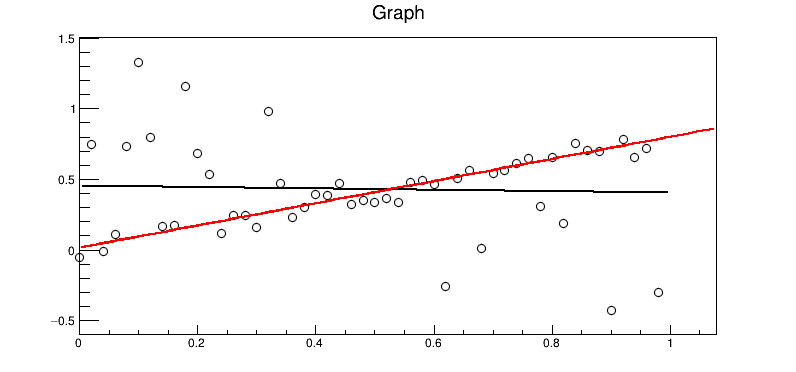

In [96]:
tf_def = ROOT.TF1("tf_def","pol1",0,1)
tf_def.SetLineColor(1)
tf_rob = ROOT.TF1("tf_rob","pol1",0,1)
tf_rob.SetLineColor(2)

# Regular fit least squares
gr.Fit(tf_def)

# "Resistant Least trimmed squares:
# Now let's try the resistant regression
# The option "rob=0.9" means that we want to use robust fitting and
# we know that at least 90% of data is good points (at least 50% of points
# should be good to use this algorithm). If you don't specify any number
# and just use "rob" for the option, default value of (npoints+nparameters+1)/2
# will be taken
gr.Fit(tf_rob,"ROB=0.72")
gr.Draw("AP")
tf_def.Draw("same")
tf_rob.Draw("same")
canv.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_res (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_rob (Potential memory leak).


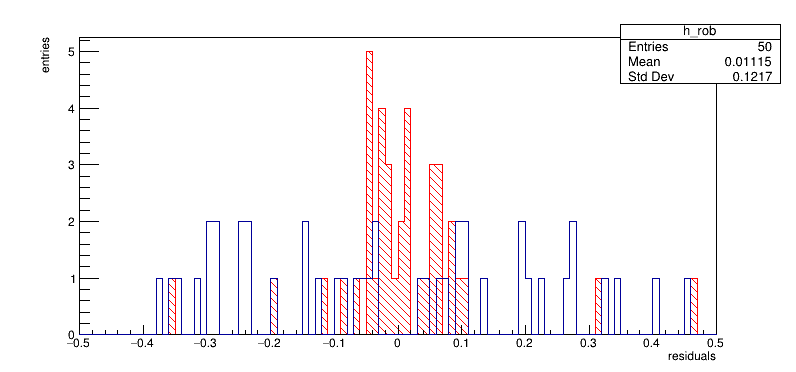

In [98]:
h_res = ROOT.TH1F("h_res",";residuals;entries",100,-0.5,0.5)
h_rob = ROOT.TH1F("h_rob",";residuals;entries",100,-0.5,0.5)
h_rob.SetLineColor(2)
h_rob.SetFillColor(2)
h_rob.SetFillStyle(3005)
for i in range(len(x_list)):
    h_res.Fill(tf_def.Eval(x_list[i])-y_list[i])
    h_rob.Fill(tf_rob.Eval(x_list[i])-y_list[i])
h_rob.Draw()
h_res.Draw("same")
canv.Draw()